Лабораторная работа №4\
Тарасов Никита 381806-3

In [ ]:
import sympy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
%autosave 10

Autosaving every 10 seconds


##Вариант 3.

###Функция и ограничения

Функция: \
$Q(x, y) = 3(y + x^2)^2 + (x^2 - 1)^2$ \

Допустимое множество: \
$D = \left\{ {-1.8\leq x \leq 1.8, -2 \leq y \leq 1: g_i(x, y) \leq 0, (i = 1,2,3)} \right\}$ \

Ограничения неравенства: \
$g_1(x, y) = y + 0.5x + 0.5$ \
$g_2(x, y) = -10(x + 1)^2 - (y - 2)^2 + 12$ \
$g_3(x, y) = y + 0.8$ 

In [ ]:
q_func = lambda x: 3 * (x[1] + x[0]**2)**2 + (x[0]**2 - 1)**2  
g1 = lambda x: x[1] + 0.5 * x[0] + 0.5
g2 = lambda x: -10 * (x[0] + 1)**2 - (x[1] - 2)**2 + 12
g3 = lambda x: x[1] + 0.8

In [ ]:
n = 500

X = np.linspace(-1.8, 1.8, n)
Y = np.linspace(-2, 1, n)
X, Y = np.meshgrid(X, Y)
Q = q_func([X, Y])

###Визуализация:

In [ ]:
 def show_plot(X, Y, Q, color = 'viridis', x_point=None, y_point=None, elev=10, azim=-120): 
  fig = plt.figure()
  ax = Axes3D(fig)
  fig.add_axes(ax)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Q')
  if color == 'viridis':
    ax.plot_wireframe(X, Y, Q, linewidth = 0.5)
  else:
    ax.plot_wireframe(X, Y, Q, color = color, linewidth=0.5)

  if (x_point and y_point):
    ax.scatter3D(x_point, y_point, func([x_point, y_point]), c='red', s=30)

  ax.view_init(elev, azim)

График минимизируемой функции:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


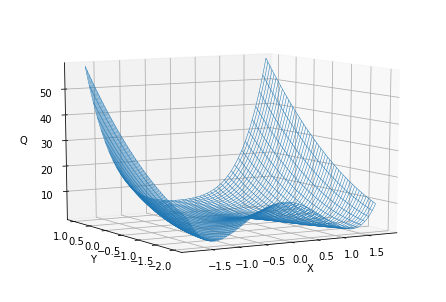

In [ ]:
show_plot(X, Y, Q)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


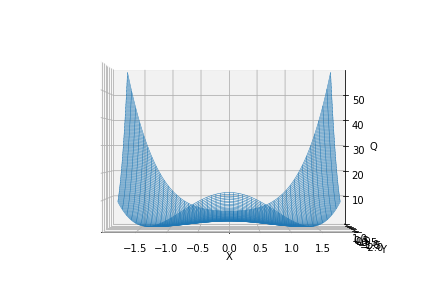

In [ ]:
show_plot(X, Y, Q, elev=0, azim=-90)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


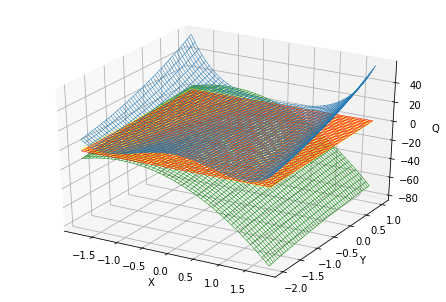

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
fig.add_axes(ax)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Q')

ax.plot_wireframe(X, Y, Q, linewidth=0.5)
ax.plot_wireframe(X, Y, g1([X, Y]), color='red', linewidth=0.5)
ax.plot_wireframe(X, Y, g2([X, Y]) , color='green', linewidth=0.5)
ax.plot_wireframe(X, Y, g3([X, Y]), color='yellow', linewidth=0.5)

# ax.view_init(0, 0w)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


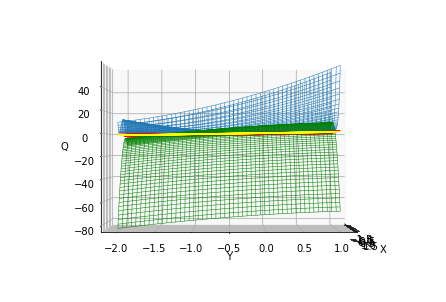

In [ ]:

fig = plt.figure()
ax = Axes3D(fig)
fig.add_axes(ax)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Q')

# ax.plot_surface(X_admiss, Y_admiss, Q_admiss, color='red')
ax.plot_wireframe(X, Y, Q, linewidth=0.5)
ax.plot_wireframe(X, Y, g1([X, Y]), color='red', linewidth=0.5)
ax.plot_wireframe(X, Y, g2([X, Y]) , color='green', linewidth=0.5)
ax.plot_wireframe(X, Y, g3([X, Y]), color='yellow', linewidth=0.5)

ax.view_init(0, 0)

Линии уровня функции и ограничений\
Желтым выделена область допустимого множества

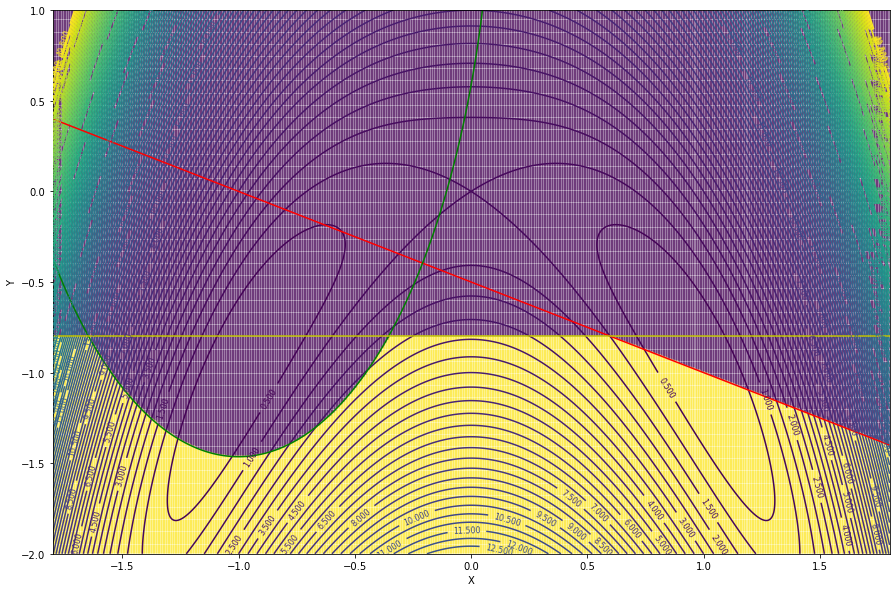

In [ ]:
plt.figure(figsize=(15, 10))
contours = plt.contour(X, Y, Q, np.arange(0, 50, 0.5))
plt.clabel(contours, inline=True, fontsize=8)
# plt.colorbar()

plt.contour(X, Y, g1([X, Y]), (0,), colors='r')
plt.contour(X, Y, g2([X, Y]), (0,), colors='g')
plt.contour(X, Y, g3([X, Y]), (0,), colors='y')

plt.pcolormesh(X, Y, (g1([X, Y]) <= 0) & (g2([X, Y]) <= 0) & (g3([X, Y]) <= 0), alpha=0.3)

plt.xlabel('X')
plt.ylabel('Y')

pass

### ККТ

Запишем уравнение Каруша-Куна-Такера для нашей задачи:

In [49]:
x, y, l1, l2 = sympy.symbols('x y l1 l2', real=True)

Q_f = 3 * (y + x**2)**2 + (x**2 - 1)**2  
g1_f = y + 0.5 * x + 0.5
g2_f = -10 * (x + 1)**2 - (y - 2)**2 + 12
g3_f = y + 0.8

Попробуем найти решение при $g_1(x,y)=0$:

In [50]:
from sympy.solvers.solveset import nonlinsolve

L = Q_f + l1*g1_f

L_dx = L.diff(x)
L_dy = L.diff(y)
L_dl1 = L.diff(l1)
L_dl2 = L.diff(l2)

eqs = [sympy.nsimplify(i, rational=1) for i in [L_dx, L_dy, L_dl1]]
sol = list(list(nonlinsolve(eqs, [x, y, l1])))

sol1 = list(sol[0])
sol2 = list(sol[1])
sol3 = list(sol[2])

sol1 = [sympy.N(x) for x in sol1]
sol2 = [sympy.N(x) for x in sol2]
sol3 = [sympy.N(x) for x in sol3]


Решения удовлетворяющие условиям ККТ:

In [51]:
sol1

[1.00000000000000, -1.00000000000000, 0]

In [ ]:
sol2

[0.157549830587259, -0.578774915293630, 3.32371779705333]

Данная точка не подходит, так как $λ_1 < 0$:




In [ ]:
sol3

[-0.595049830587259, -0.202475084706370, -0.909655297053333]

Изобразим на графике точки решения sol1 и sol2:

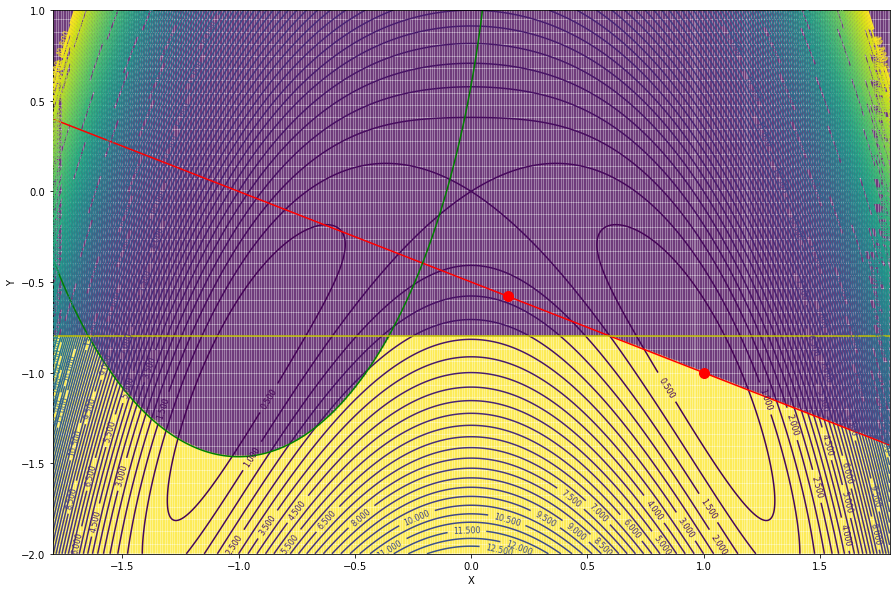

In [ ]:
plt.figure(figsize=(15, 10))
contours = plt.contour(X, Y, Q, np.arange(0, 50, 0.5))
plt.clabel(contours, inline=True, fontsize=8)
# plt.colorbar()

plt.contour(X, Y, g1([X, Y]), (0,), colors='r')
plt.contour(X, Y, g2([X, Y]), (0,), colors='g')
plt.contour(X, Y, g3([X, Y]), (0,), colors='y')

plt.pcolormesh(X, Y, (g1([X, Y]) <= 0) & (g2([X, Y]) <= 0) & (g3([X, Y]) <= 0), alpha=0.3)

plt.scatter(sol1[0], sol1[1], color='red', s=100)
plt.scatter(sol2[0], sol2[1], color='red', s=100)
# plt.scatter(x_g2_min, y_g2_min, color='green', s=100)

# plt.annotate('min', xy=(x_g1_min, y_g1_min+0.05 ))

plt.xlabel('X')
plt.ylabel('Y')

pass

Только одна точка находится в допустимом множетсве - sol1

Найдем значение функции в этой точке:

In [55]:
q_func(sol1)

0

## Поиск минимума с помощью модуля scipy

In [ ]:
import scipy.optimize as opt

min = opt.minimize(q_func, [1, 1])
x_min, y_min = min.x
x_min, y_min

(0.9999999821064758, -0.9999999731427249)

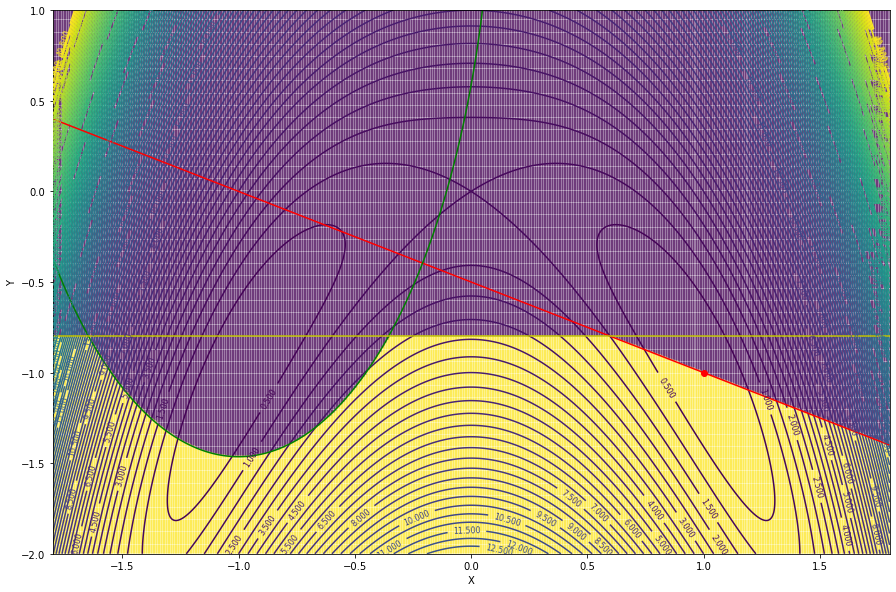

In [ ]:
plt.figure(figsize=(15, 10))
contours = plt.contour(X, Y, Q, np.arange(0, 50, 0.5))
plt.clabel(contours, inline=True, fontsize=8)
# plt.colorbar()

plt.contour(X, Y, g1([X, Y]), (0,), colors='r')
plt.contour(X, Y, g2([X, Y]), (0,), colors='g')
plt.contour(X, Y, g3([X, Y]), (0,), colors='y')

plt.pcolormesh(X, Y, (g1([X, Y]) <= 0) & (g2([X, Y]) <= 0) & (g3([X, Y]) <= 0), alpha=0.3)

plt.scatter(x_min, y_min, color='red')

plt.xlabel('X')
plt.ylabel('Y')

pass